In [1]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = pd.read_csv("./Urban Actuals.csv")
data=data.dropna()
data

,Date,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,01-01-2013,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
1,01-02-2013,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
2,01-03-2013,113.9,111.4,113.2,104.3,102.7,104.9,103.8,103.5,102.6,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
3,01-04-2013,114.6,113.4,106.0,104.7,102.1,109.5,109.7,104.6,102.0,...,100.5,106.4,106.5,105.7,105.0,104.0,105.2,103.2,105.1,105.7
4,01-05-2013,115.4,114.2,102.7,105.5,101.5,110.6,123.7,105.2,101.9,...,100.5,107.2,107.1,106.2,103.9,104.6,105.7,102.6,104.9,106.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,01-11-2022,168.4,213.4,183.2,172.3,180.0,162.6,205.5,171.0,123.4,...,171.8,180.3,166.9,175.8,158.9,166.7,171.5,173.8,167.4,174.1
118,01-12-2022,170.2,212.9,191.9,173.9,179.1,159.5,178.7,171.3,123.1,...,170.7,180.6,167.3,177.2,159.4,167.1,171.8,176.0,168.2,174.1
119,01-01-2023,173.3,215.2,197.0,175.2,178.0,160.5,175.3,171.2,122.7,...,172.1,180.1,168.0,178.5,159.5,167.8,171.8,178.8,168.9,174.9
120,01-02-2023,174.7,212.2,177.2,177.9,172.2,172.1,175.8,172.2,121.9,...,173.5,182.8,169.2,180.8,159.8,168.4,172.5,181.4,170.0,176.3


In [3]:
data.columns=data.columns.str.strip()
data.columns=data.columns.str.replace(" ","_")
data.columns

Index(['Date', 'Cereals_and_products', 'Meat_and_fish', 'Egg',
       'Milk_and_products', 'Oils_and_fats', 'Fruits', 'Vegetables',
       'Pulses_and_products', 'Sugar_and_Confectionery', 'Spices',
       'Non-alcoholic_beverages', 'Prepared_meals,_snacks,_sweets_etc.',
       'Food_and_beverages', 'Pan,_tobacco_and_intoxicants', 'Clothing',
       'Footwear', 'Clothing_and_footwear', 'Housing', 'Fuel_and_light',
       'Household_goods_and_services', 'Health', 'Transport_and_communication',
       'Recreation_and_amusement', 'Education', 'Personal_care_and_effects',
       'Miscellaneous', 'General_index'],
      dtype='object')

In [4]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
data=data.set_index('Date')
data.head()

,Cereals_and_products,Meat_and_fish,Egg,Milk_and_products,Oils_and_fats,Fruits,Vegetables,Pulses_and_products,Sugar_and_Confectionery,Spices,...,Housing,Fuel_and_light,Household_goods_and_services,Health,Transport_and_communication,Recreation_and_amusement,Education,Personal_care_and_effects,Miscellaneous,General_index
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,101.8,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2013-02-01,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,102.3,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
2013-03-01,113.9,111.4,113.2,104.3,102.7,104.9,103.8,103.5,102.6,102.4,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
2013-04-01,114.6,113.4,106.0,104.7,102.1,109.5,109.7,104.6,102.0,103.5,...,100.5,106.4,106.5,105.7,105.0,104.0,105.2,103.2,105.1,105.7
2013-05-01,115.4,114.2,102.7,105.5,101.5,110.6,123.7,105.2,101.9,105.0,...,100.5,107.2,107.1,106.2,103.9,104.6,105.7,102.6,104.9,106.6


In [5]:
data_filtered=pd.DataFrame(data['Pulses_and_products'])
data_filtered

,Pulses_and_products
Date,
2013-01-01,105.8
2013-02-01,104.1
2013-03-01,103.5
2013-04-01,104.6
2013-05-01,105.2
...,...
2022-11-01,171.0
2022-12-01,171.3
2023-01-01,171.2


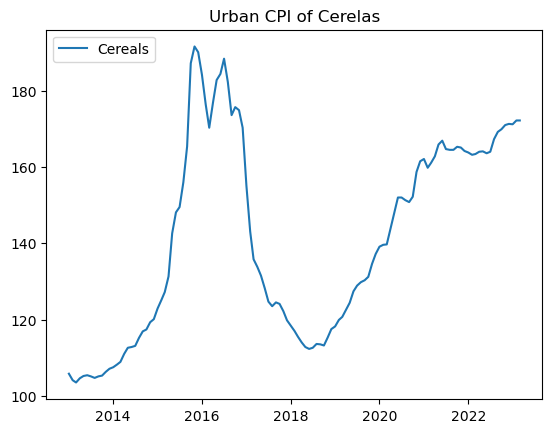

In [6]:
plt.plot(data_filtered,label='Cereals')
plt.title("Urban CPI of Cerelas")
plt.legend(loc="upper left")

<Figure size 4000x1600 with 0 Axes>

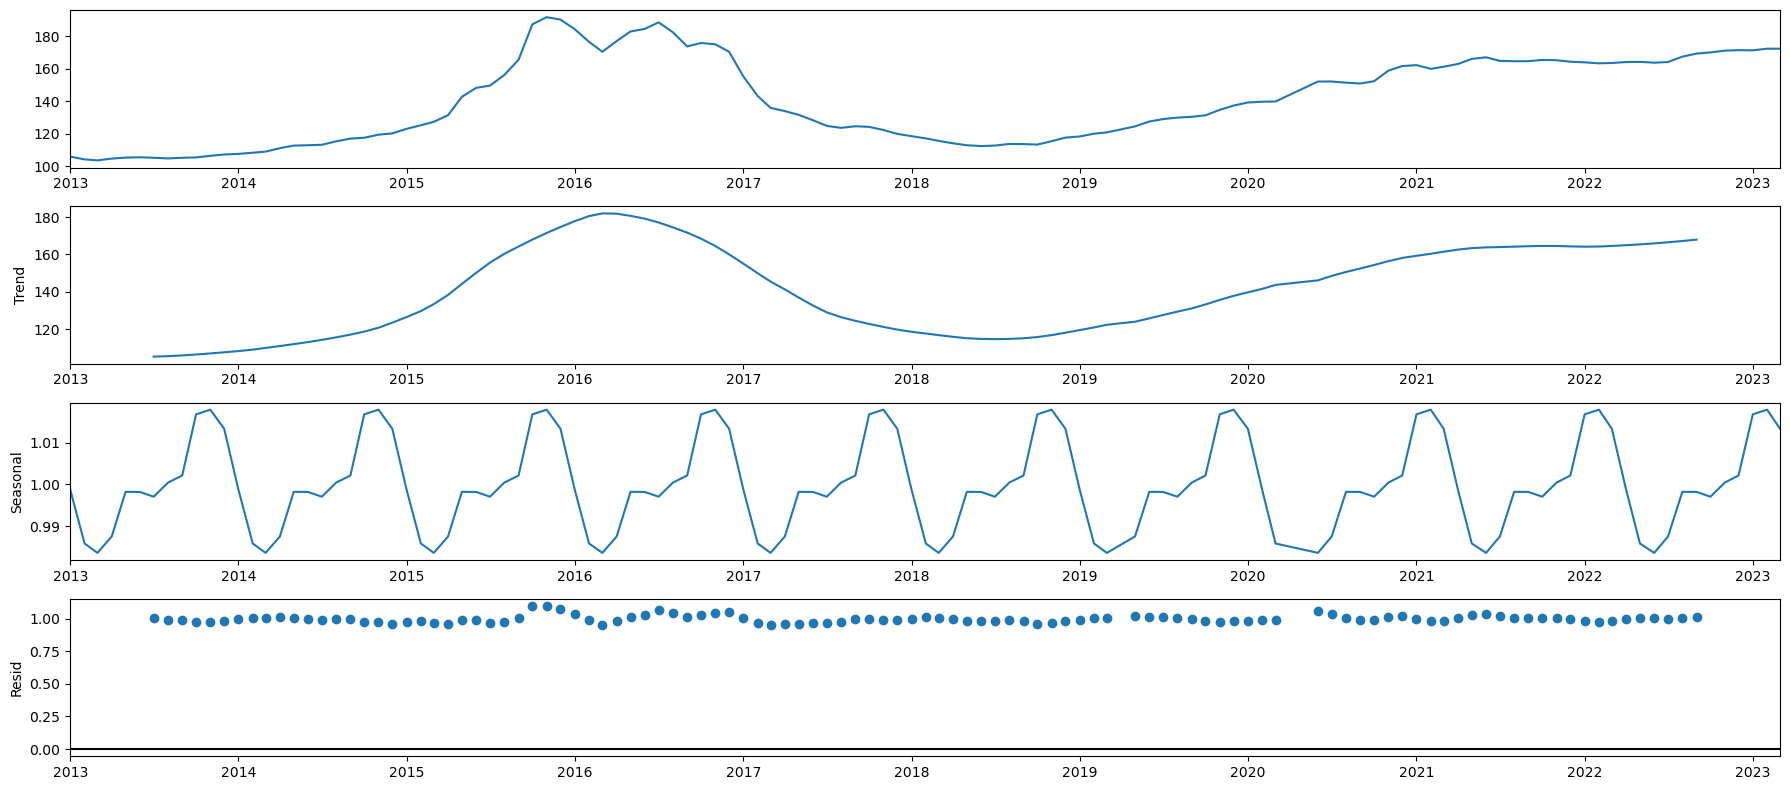

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose


rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = data_filtered
result = seasonal_decompose(series, model='mutiplicative',period=12)
result.plot();

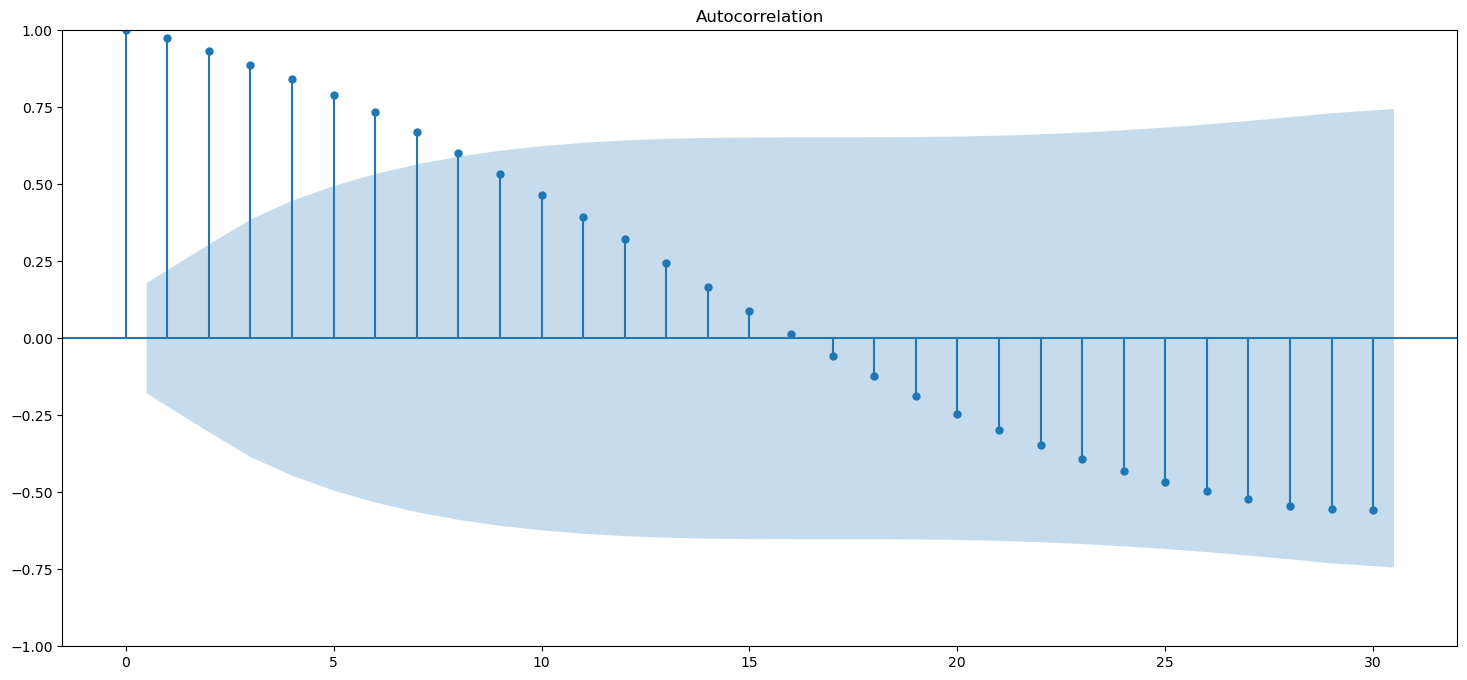

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_filtered, lags=30); #q=10

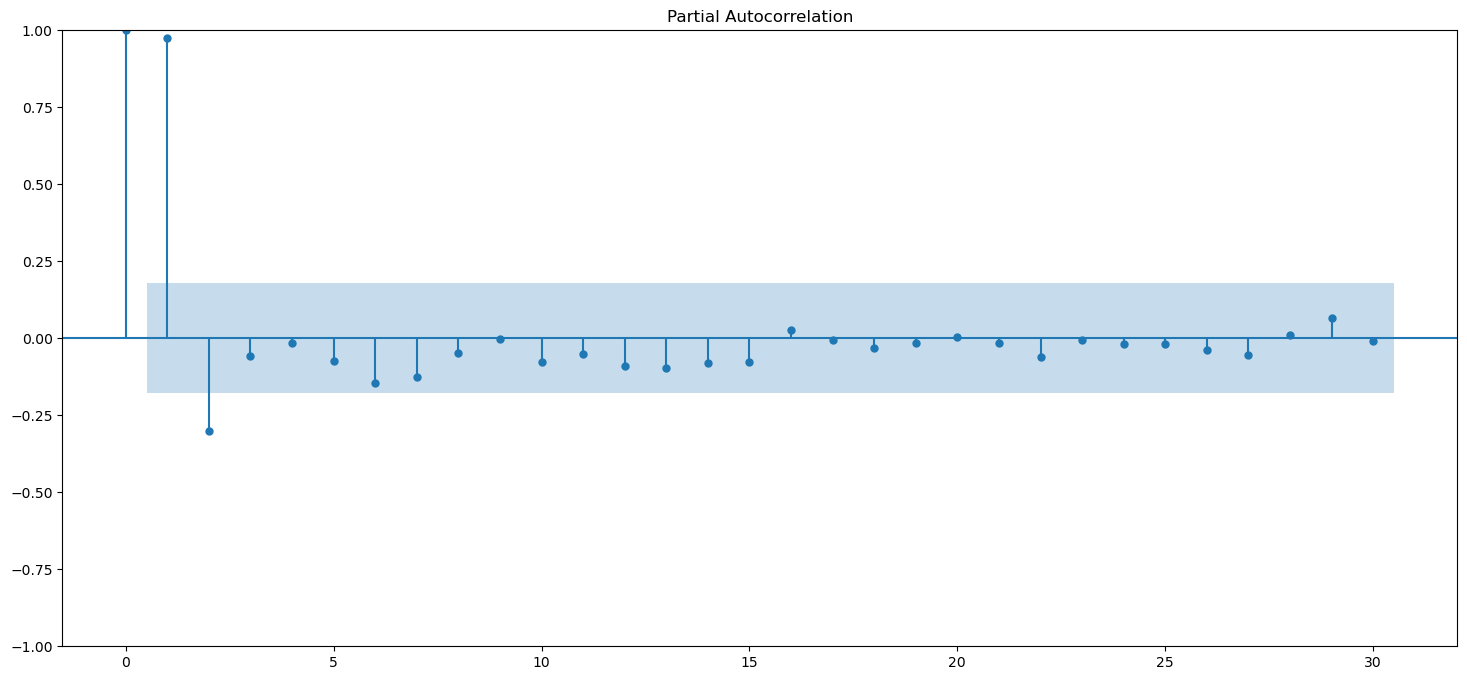

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_filtered, lags=30, method='ywm'); #p=2

In [10]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(data_filtered)
print("p-value: ",result[1])

result=adfuller(data_filtered.diff().dropna())
print("p-value: ",result[1])

result=adfuller(data_filtered.diff().diff().dropna())
print("p-value: ",result[1])

p-value:  0.1623437519037852
p-value:  0.0543190572093082
p-value:  1.3313442345091876e-17


In [11]:
#train-test split


forecast_horizon=6
train=data_filtered[:'2022-09-01']
test=data_filtered['2022-10-01':]

#print(train)
print(test)
#print(train.shape())
#print(test.shape())

            Pulses_and_products
Date                           
2022-10-01                169.9
2022-11-01                171.0
2022-12-01                171.3
2023-01-01                171.2
2023-02-01                172.2
2023-03-01                172.2


In [12]:
from statsforecast.models import AutoETS

autoets=AutoETS(model='AZZ')

D:\Anaconda\envs\major\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [13]:
autoets=autoets.fit(train['Pulses_and_products'].to_numpy())

In [14]:
y_pred=autoets.predict(6)
a=np.array(y_pred.items())
a

array(dict_items([('mean', array([169.95312296, 170.70637604, 171.36657747, 171.94522221,
       172.4523852 , 172.89689681]))]), dtype=object)

In [15]:
li=[169.95312296, 170.70637604, 171.36657747, 171.94522221,
       172.4523852 , 172.89689681]

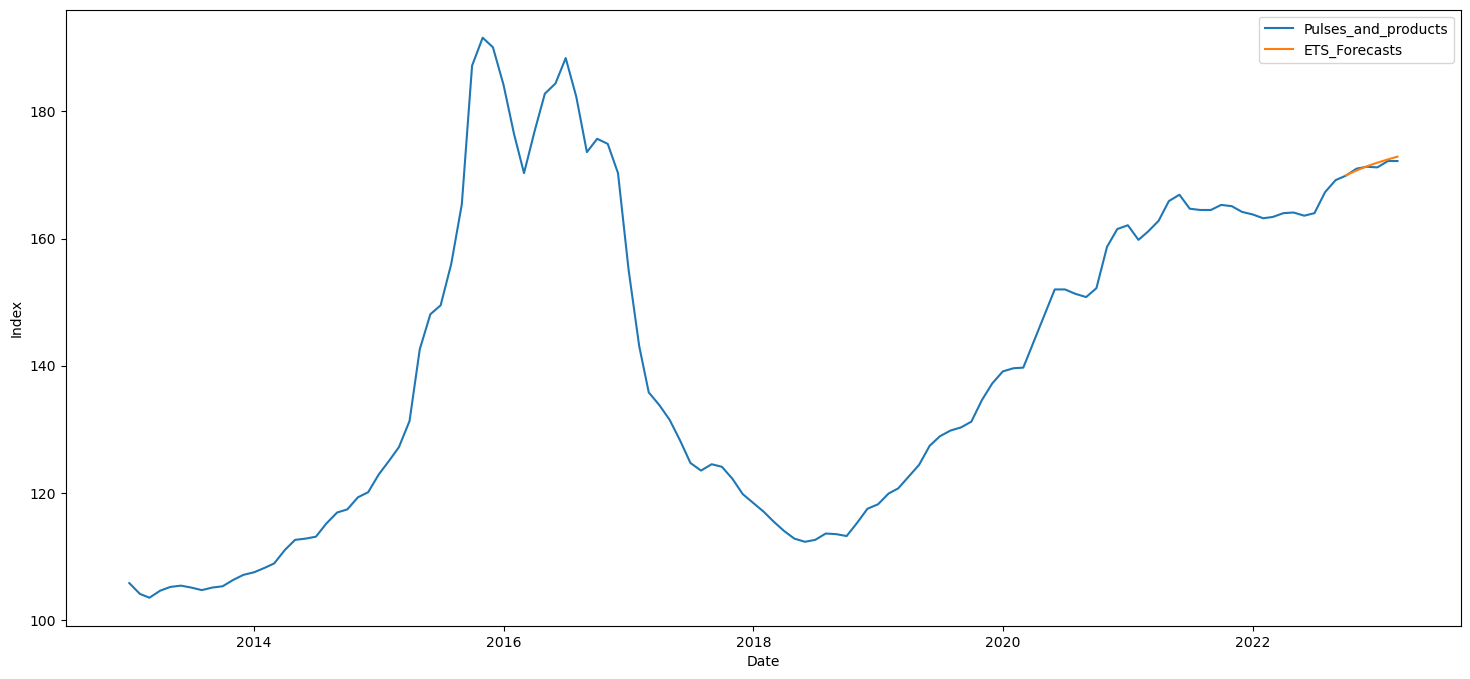

In [18]:
data_copy=data_filtered.copy()
data_copy['ETS_Forecasts']=[None]*len(train)+li
val=['Pulses_and_products','ETS_Forecasts']
plt.plot(data_copy[val])
plt.legend(['Pulses_and_products','ETS_Forecasts'])
plt.xlabel('Date')
plt.ylabel('Index')

plt.savefig("pp.png", dpi=1900)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import math

'''mape_12=mean_absolute_percentage_error(test,li)*100
mae_12=mean_absolute_error(test,li)
rmse_12=math.sqrt(mean_squared_error(test,li))

print("12 Months")
print("mape: ",mape_12)
print("\nmae: ",mae_12)
print("\nrmse: ",rmse_12)
'''

mape_6=mean_absolute_percentage_error(test.head(6),li[:6])*100
mae_6=mean_absolute_error(test.head(6),li[:6])
rmse_6=math.sqrt(mean_squared_error(test.head(6),li[:6]))

print("\n6 Months")
print("mape: ",mape_6)
print("\nmae: ",mae_6)
print("\nrmse: ",rmse_6)


6 Months
mape:  0.2047339336021053

mae:  0.35130476833333546

rmse:  0.4468760517043771
